## **Knowledge Graphs in Linguistic Studies**

*Knowledge graphs are very powerful tools in data science and NLP, which, allow by means of NLP methods, to retrieve structured information from unstructured data (i.e. text) and discover relationships between objects we might study.*

---
In other words, graphs allow to build **semantic networks**.


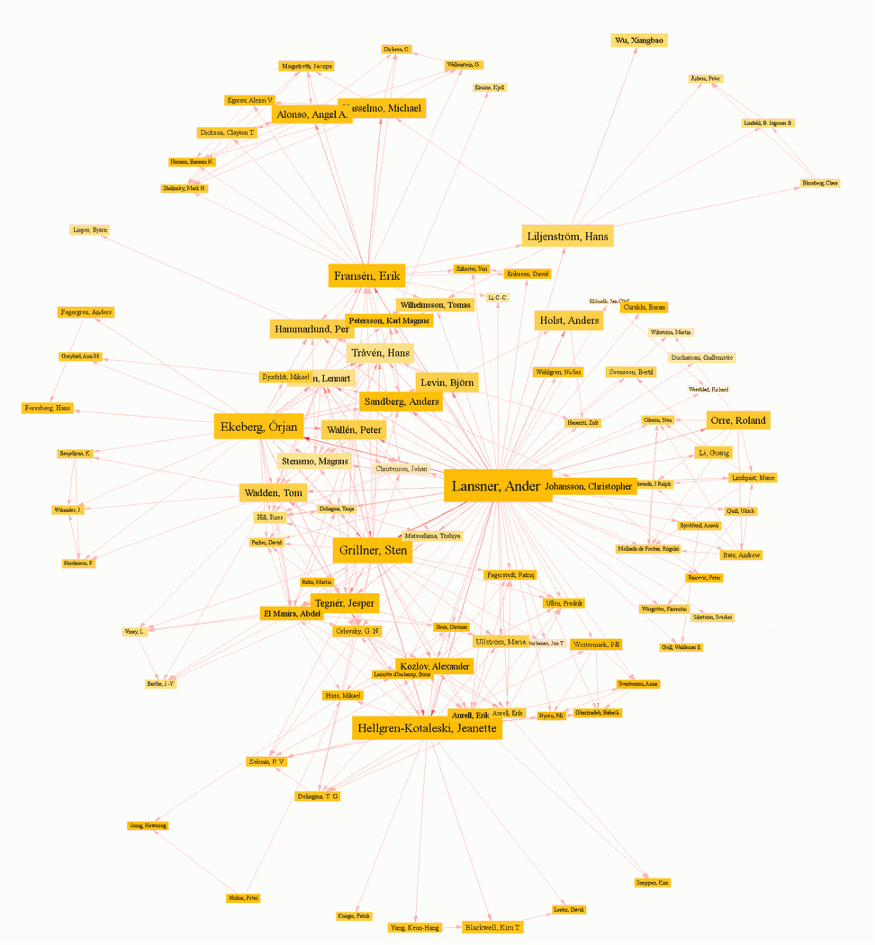

## Let's start with a definition

The most common definition of graph is **"a set of nodes and edges"**.
It is a semantic network of different entities.

**NB!** *Graph here is not a bar chart, a pie chart, a line plot, etc. It is a system of interconnected objects.*
For instance, we have this graph:

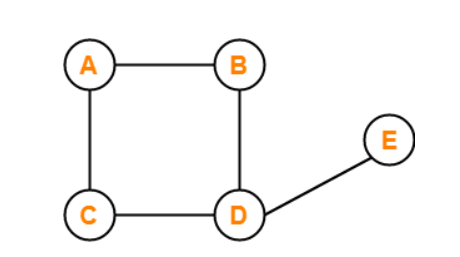

We will briefly examine its basic components.

In this particular example A, B, C, D and E are NODES. They usually represent entities in the network and can hold *self-properties* 
* weight
* size
* position
* any other attribute
and *network-based properties*
* degree (number of neighbours)
* cluster (a connected component the node belongs to)

As for AB, BA, AC, CA, CD, DC, BD, DB, DE and ED - they represent the connections between the nodes and are called EDGES. They might holt properties as well: 
* weight (the strength of the connection)
* direction (in case of asymmetric relation)
* time (if applicable)

In real-world conditions these 2 elements can be used to describe various phenomena:
*social connections, virtual routing network, physical electricity networks, roads network, biology relations network and many other relationships*.

### Types of graphs
1. Null Graph
2. Trivial Graph
3. Non-directed Graph
4. Directed Graph
5. Connected Graph
6. Disconnected Graph
7. Regular Graph
8. Complete Graph
9. Cycle Graph
10. Cyclic Graph
11. Acyclic Graph
12. Finite Graph
13. Infinite Graph
14. Bipartite Graph
15. Planar Graph
16. Simple Graph
17. Multi Graph
18. Pseudo Graph
19. Euler Graph
20. Hamiltonian Graph 
---
If you would like to dive deeper into Graph Theory - check out this [link](https://www.gatevidyalay.com/graphs-types-of-graphs/).

###  Natural Language Processing (NLP) tasks that can benefit from graph representations of free-text: **Keyword Extraction, Summarisation**, etc.

***Converting free-text to a graph representation makes the text’s implicit structure explicit.*** This means that now you have immediate access to information such as which words are most commonly used (degree), which n-grams are most commonly used, which words are most commonly used to flow information (paths in the graph between every two nodes), and much more. 

Whatever the representation is, the main idea is always the same: 
**first, identify entities in the text to represent as nodes in the graph**, and, **second, identify relations between those entities to represent as edges between nodes in the graph**. The exact types of entities and relations are context and task dependent.

Entities can be individual words, bigrams, n-grams, sequences of variable lengths, etc.; Relations can represent adjacency between entities in a sentence, co-occurrence in a window of fixed length, some kind of semantic or syntactic relation, etc.


## **Building a network**

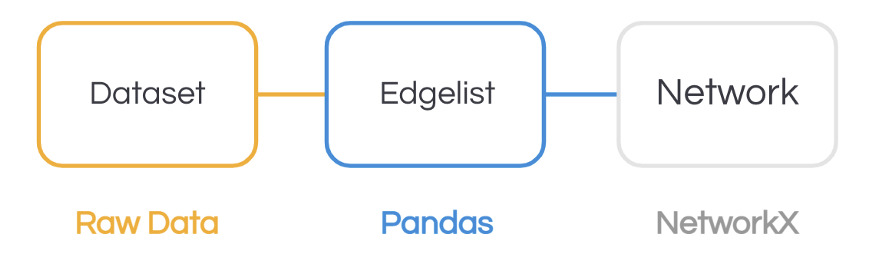

#### Networks can be constructed from various datasets, as long as we’re able to describe the relations between nodes

---
#### [EXAMPLE](https://youtu.be/px7ff2_Jeqw) from Pycon 2019 talk
Schematic process of Game of Thrones network creation.
+ calculating the speed of rumor spreading

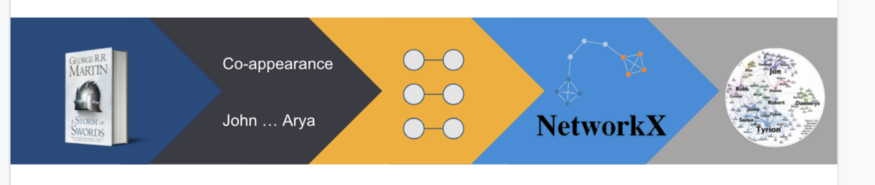

---

# **Harry Potter social graph creation tutorial**

In [ ]:
!pip install pyvis -q
!pip install --upgrade spacy -q
!python -m spacy download en_core_web_lg -q

     |████████████████████████████████| 777.4 MB 5.5 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
from operator import itemgetter

# for natural language processing
import re
import spacy

# for visualization
%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx
from pyvis.network import Network

In [ ]:
# loading data
from bs4 import BeautifulSoup
import requests
url = 'https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt'
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
text = soup.get_text().lower()
if "\n" in text:
  text = text.replace("\n", "")


In [ ]:
text

'the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. mr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere. the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didn’t think they could bear it if anyone found out about the potters. mrs. potter was mrs. dursley’s sister, but they hadn’t p

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Preprocessing text and extracting named entities
def preprocess(text):
  pattern = r'Page \| \d+ Harry Potter and the Philosophers Stone - J\.K\. Rowling |\s{2,}|[,–:—;”“()«»<>+=\d]|’s|yeh'
  text = re.sub(pattern, '', text, flags=re.I)
  lemmas = [token.lemma_ for token in nlp(text)]
  characters = list(set([ent.text.title() for ent in nlp(" ".join(lemmas)).ents if ent.label_ == "PERSON"]))
  if characters:
    return characters

In [ ]:
sentences = re.sub('\.{2,}|!+|\?+', '.', text).split('.')
all_characters = []
for sentence in sentences:
  names = preprocess(sentence)
  if names:
    all_characters.append(names)

In [ ]:
all_characters

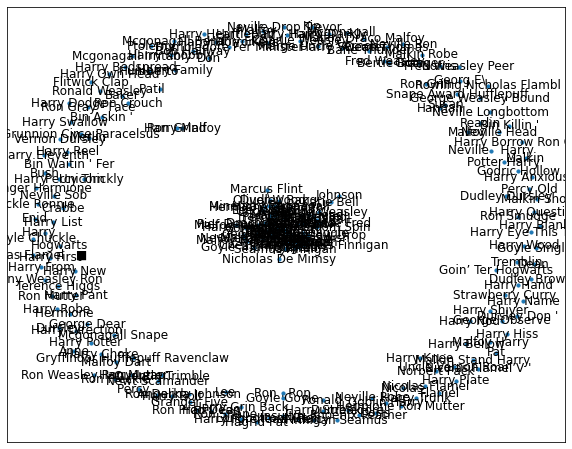

In [ ]:
G = nx.Graph() # creating graph

for entities in all_characters: # adding nodes
    G.add_nodes_from(entities)

for entities in all_characters:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G.add_edges_from([(str(entities[i]),str(entities[i+1]))]) # adding edges
  
figure(figsize=(10, 8))
nx.draw_networkx(G, node_size=10) # plotting graph

#### *Some other possible options for plotting*
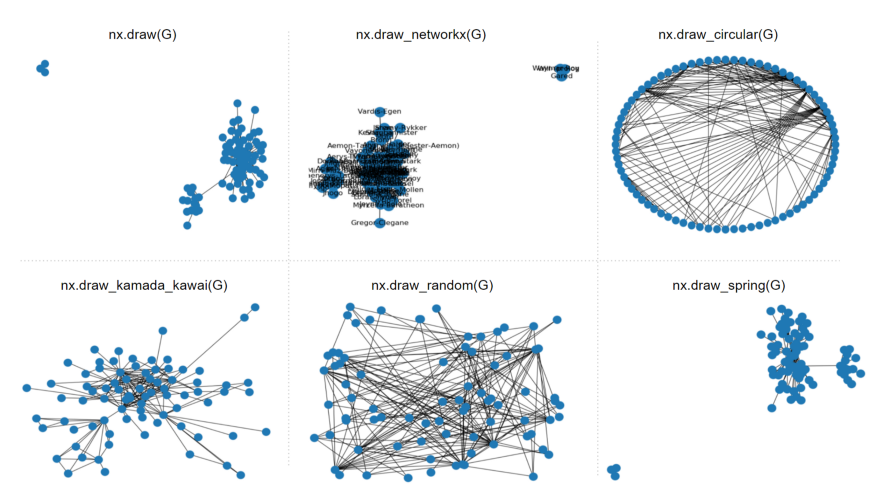

Now some statistics from the text

In [ ]:
degree_dict = dict(G.degree(G.nodes())) # all the nodes and their degree values
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree (main characters):")
for d in sorted_degree[:5]:
  print(d[0])

Top 5 nodes by degree (main characters):
Harry
Ron
Gryffindor
Harry Potter
Hermione


In [ ]:
# creating an interactive graph with PyVis
net = Network(notebook=True)
net.from_nx(G)
net.show('harry_potter_graph.html')

[PyVis](https://pyvis.readthedocs.io/en/latest/index.html) *is an interactive network visualization python package which takes the NetworkX graph as input. It also provides multiple styling options to customize the nodes, edges and even the complete layout.*
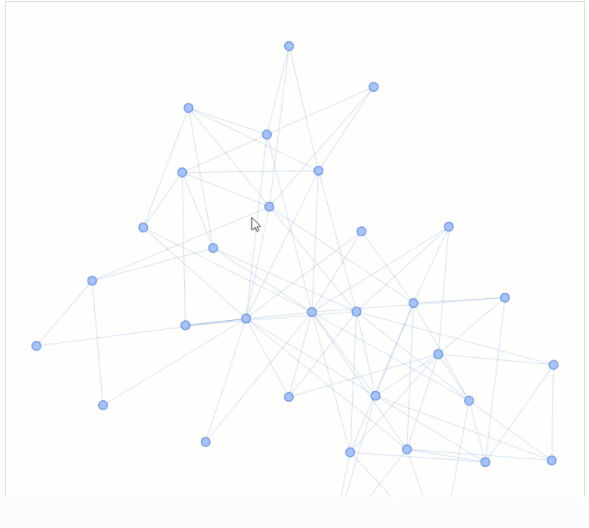

### **[Gephi](https://gephi.org/)** *is an open-source and free desktop application that lets us visualize, explore, and analyze all kinds of graphs and networks.*
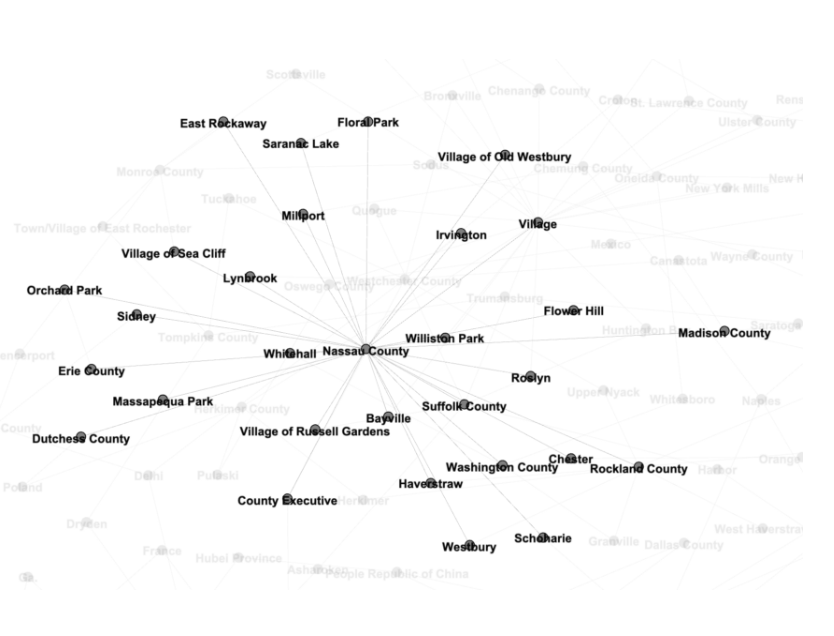

In [ ]:
# nx.write_gexf(G, 'harry_potter_graph.gexf') # exporting graph data into a file for importing it into Gephi

---
## **NER in detail**
Named Entity Recognition (NER) is a standard NLP problem which involves spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories.

References: ***https://spacy.io/usage/linguistic-features#named-entities***

In [ ]:
!pip install --upgrade spacy -q # update spaCy
# load language models (sm=efficiency, lg=accuracy)
!python -m spacy download en_core_web_lg -q
!python -m spacy download ru_core_news_sm -q

     |████████████████████████████████| 777.4 MB 5.6 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     |████████████████████████████████| 16.4 MB 541 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [ ]:
import spacy
from spacy import displacy

# using a trained pipeline model 
nlp = spacy.load('en_core_web_lg')

story = '''Dudley, who was so large his bottom drooped over either side of the kitchen chair, grinned and turned to Harry.
"Pass the frying pan."
"You've forgotten the magic word," said Harry irritably.
The effect of this simple sentence on the rest of the family was incredible: Dudley gasped and fell off his chair with a crash that shook the whole kitchen; Mrs. Dursley gave a small scream and clapped her hands to her mouth; Mr. Dursley jumped to his feet, veins throbbing in his temples.
"I meant please'!" said Harry quickly. "I didn't mean--"
"WHAT HAVE I TOLD YOU," thundered his uncle, spraying spit over the table, "ABOUT SAYING THE M'WORD IN OUR HOUSE?"
"But I--"
"HOW DARE YOU THREATEN DUDLEY!" roared Uncle Vernon, pounding the table with his fist.
"I just--"
"I WARNED YOU! I WILL NOT TOLERATE MENTION OF YOUR ABNORMALITY UNDER THIS ROOF!"
Harry stared from his purple-faced uncle to his pale aunt, who was trying to heave Dudley to his feet.
"All right," said Harry, " all right..."'''

doc = nlp(story)
  
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
# for more clear and detailed understanding
# spacy provides .label_ to get the entity for the text 
# and spacy.explain() to understand what the label means

# visualising named entities
displacy.render(doc, style='ent', jupyter=True)

Dudley 0 6 PERSON
Harry 105 110 PERSON
Harry irritably 175 190 PERSON
Dudley 269 275 PERSON
Dursley 354 361 PERSON
Dursley 422 429 PERSON
Harry 506 511 PERSON
HOUSE 646 651 ORG
DUDLEY 687 693 PERSON
Uncle Vernon 703 715 PERSON
Harry 843 848 PERSON
Dudley 926 932 PERSON
Harry 964 969 PERSON
